<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-581723-1694404198/blob/main/Assignment_5(N_Nitin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1: Download the Dataset

N.NITIN 21BCE5165

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2: Data Pre-Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: >

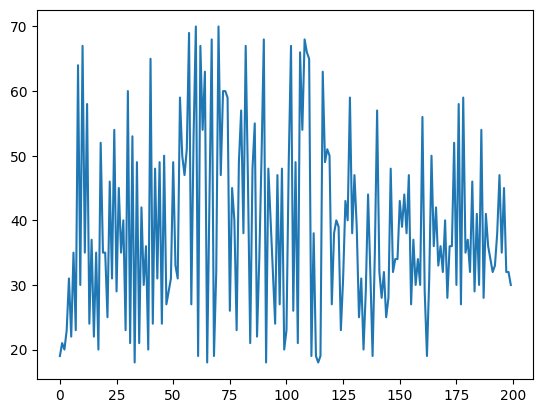

In [4]:
#Univariate Analysis of Age
df['Age'].plot()


<Axes: ylabel='Frequency'>

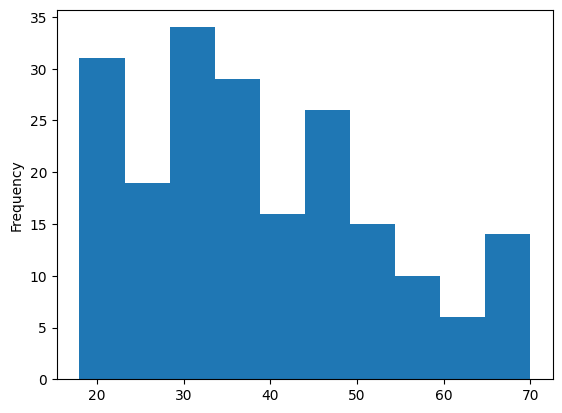

In [5]:
df['Age'].plot(kind = 'hist')

<Axes: >

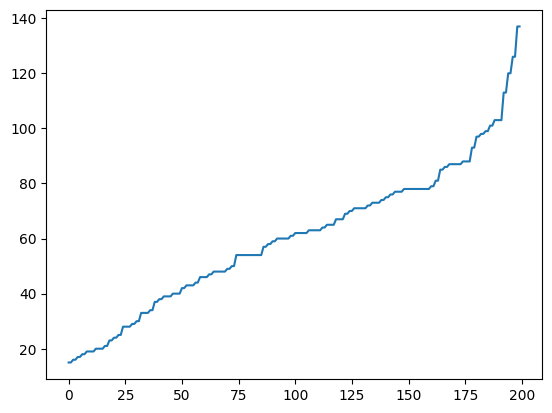

In [6]:
#Univariate Analysis of Annual Income (k$)
df['Annual Income (k$)'].plot()

<Axes: ylabel='Frequency'>

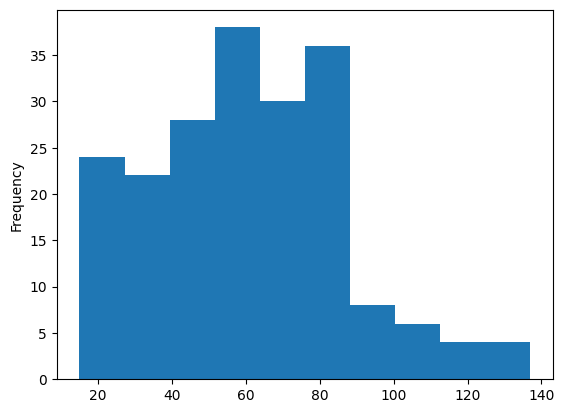

In [7]:
df['Annual Income (k$)'].plot(kind='hist')

<Axes: >

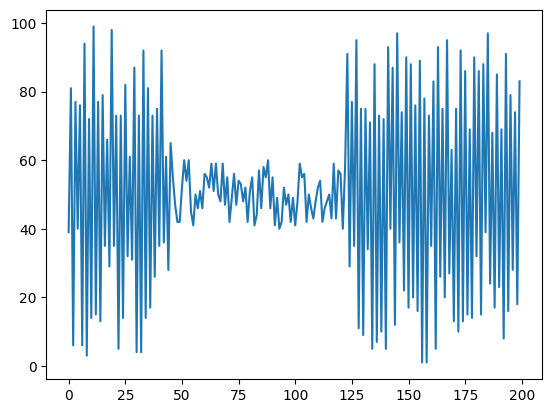

In [8]:
#Univariate Analysis of Spending Score (1-100))
df['Spending Score (1-100)'].plot()

<Axes: ylabel='Frequency'>

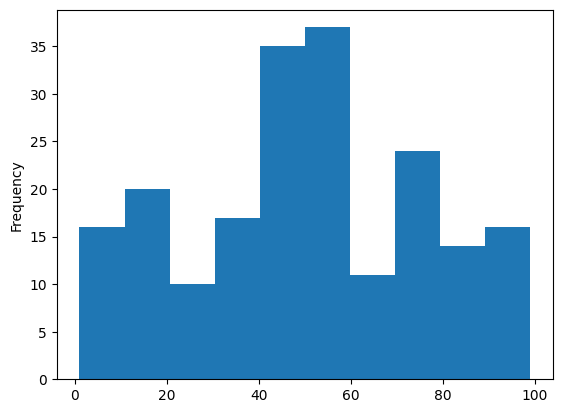

In [9]:
df['Spending Score (1-100)'].plot(kind='hist')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

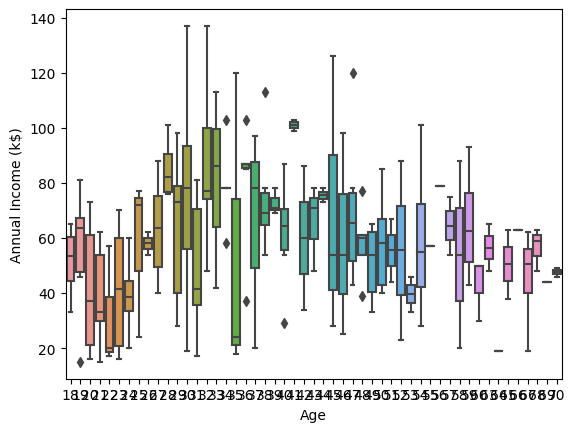

In [10]:
#Bivariate Analysis of Age and Annual Income (k$)
sns.boxplot(data=df, x='Age', y='Annual Income (k$)')

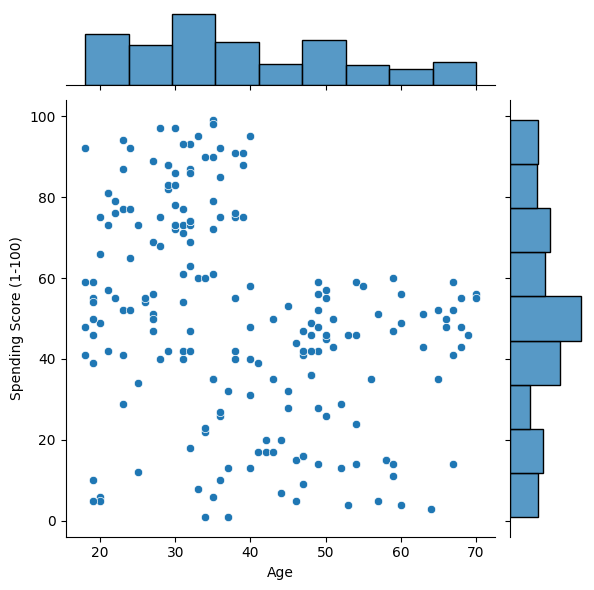

In [11]:
#Bivariate Analysis of Age and Spending Score (1-100)
sns.jointplot(data=df, x='Age', y='Spending Score (1-100)')


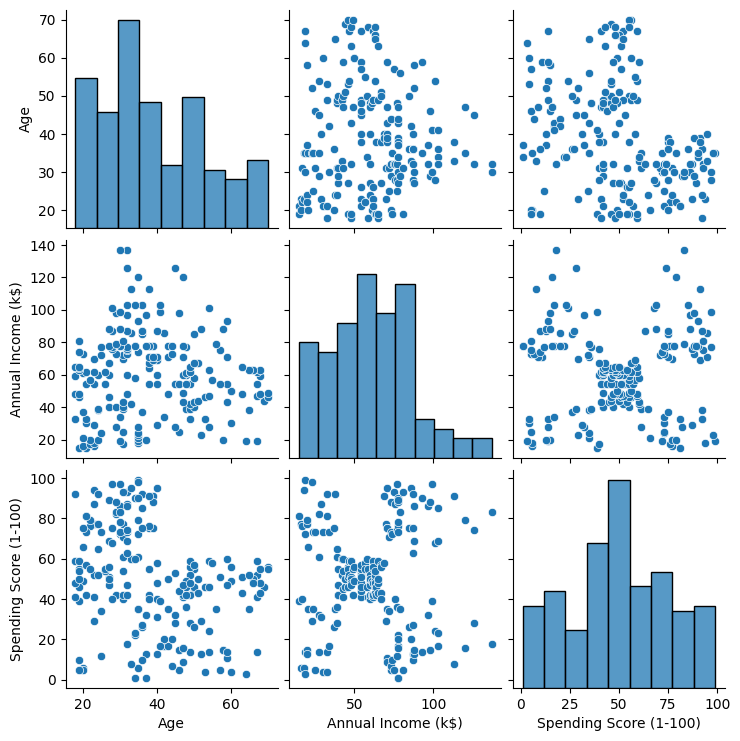

In [13]:
 #Multi-Variate Analysis

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

<ipython-input-14-88edb43bf50b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


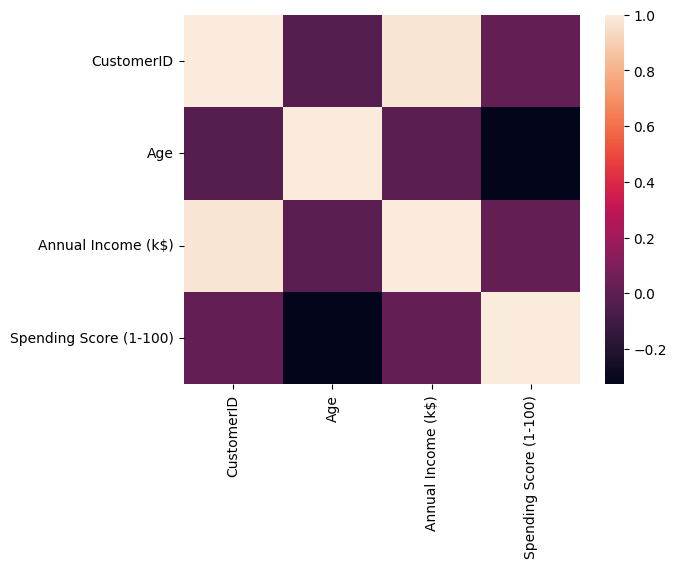

In [14]:
sns.heatmap(df.corr())
plt.show()

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<Axes: >

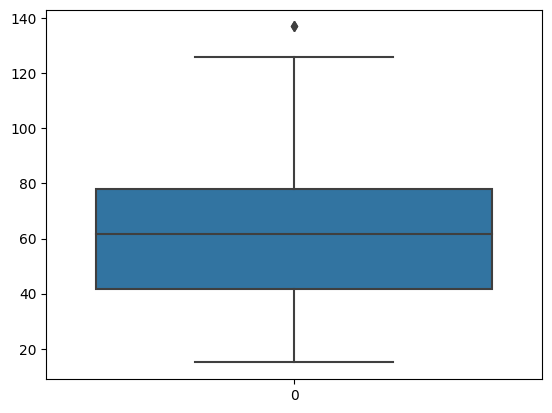

In [17]:
import seaborn as sb
sb.boxplot(df['Annual Income (k$)'])

In [18]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Annual Income (k$)']>=upper)[0]
lower_array = np.where(df['Annual Income (k$)']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

<Axes: >

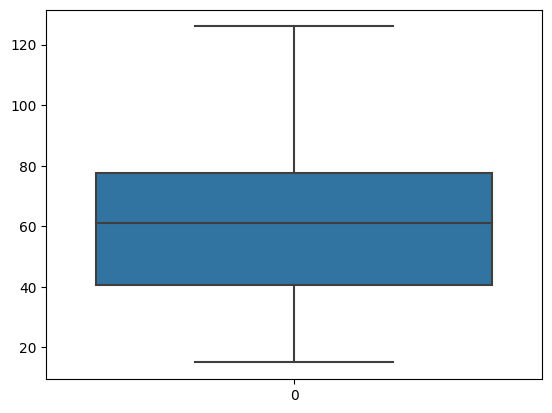

In [19]:
sb.boxplot(df['Annual Income (k$)'])

<Axes: >

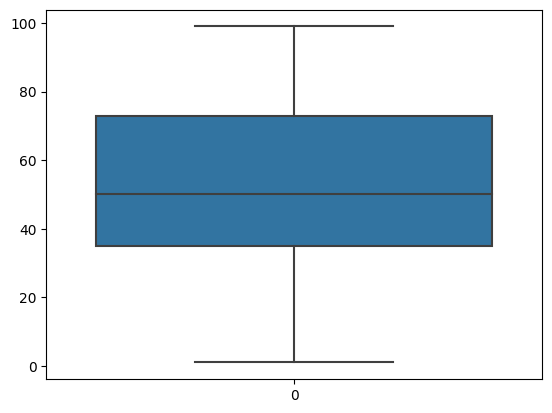

In [20]:
sb.boxplot(df['Spending Score (1-100)'])


<Axes: >

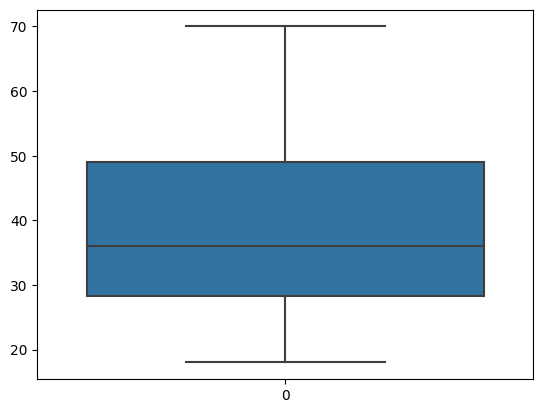

In [21]:
sb.boxplot(df['Age'])

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


3: Machine Learning Model Building with Clustering Algorithm

In [24]:
X =df.iloc[:,:-1] # Independent variables (features)
X.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [25]:
print("Shape of X (features):", X.shape)

Shape of X (features): (198, 4)


In [26]:
y =df['Spending Score (1-100)'] # Dependent variable (target)
y.head()


0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

In [27]:
print("Shape of y (target):", y.shape)

Shape of y (target): (198,)


In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Check the shapes of training and testing data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (148, 4)
Shape of X_test: (50, 4)
Shape of y_train: (148,)
Shape of y_test: (50,)


4: Scaling Our Data

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


5: Implementing Clustering Algorithm

In [30]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [31]:
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [32]:
predict = km.predict(X)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [33]:
df['Cluster'] = predict
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
193,194,0,38,113,91,0
194,195,0,47,120,16,0
195,196,0,35,120,79,0
196,197,0,45,126,28,0


In [35]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

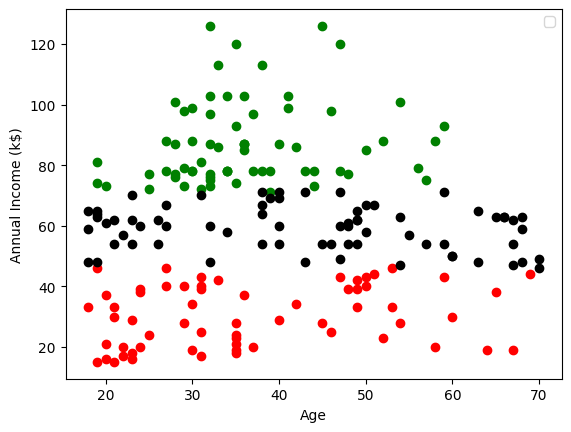

In [36]:
plt.scatter(df1['Age'],df1['Annual Income (k$)'],color='green')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],color='red')
plt.scatter(df3['Age'],df3['Annual Income (k$)'],color='black')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

In [37]:
km.predict([[1.1,2.3,4.2,4.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [38]:
km.predict([[2.2,2.0,1.3,1.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)